In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ivim_tensor import IvimTensorModel

In [3]:
from dipy.core.gradients import gradient_table

In [4]:
gtab = gradient_table('./data/DWI_IVIM6.bval', './data/DWI_IVIM6.bvec', b0_threshold=0)

In [5]:
from dipy.sims.voxel import multi_tensor

In [6]:
mevals = np.array([[0.001, 0.0005, 0.0005], 
                   [0.1, 0.01, 0.01]])

angles = [(90, 0), (90, 0)]

In [7]:
perfusion_fraction = 0.2

In [37]:
sim = multi_tensor(gtab, mevals=mevals, snr=20, fractions=[100 * (1-perfusion_fraction), 
                                                             perfusion_fraction * 100])[0]

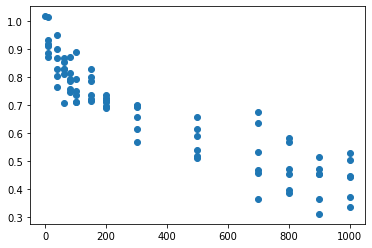

In [38]:
plt.plot(gtab.bvals, sim, 'o')

In [39]:
itm = IvimTensorModel(gtab)

In [40]:
itf = itm.fit(sim)

0.0007420475112126933


/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [41]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [42]:
itf.perfusion_fraction, itf.perfusion_fit.md, itf.diffusion_fit.md

(0.2009273757337514, 0.041441641786589684, 0.0006385265044437301)

In [14]:
import nibabel as nib

In [15]:
img = nib.load('./data/DWI_IVIM6.nii')

In [16]:
data = img.get_fdata()

In [17]:
idx = (48, 20)

In [18]:
signal = data[:, :, 10, :][idx]

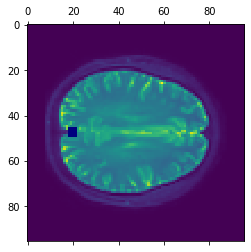

In [19]:
fig, ax = plt.subplots()
ax.matshow(data[:, :, 10, -1])
ROI = np.ones(data[:, :, 10, -1].shape) * np.nan
ROI[idx[0]-2:idx[0]+2, idx[1]-2:idx[1]+2] = 1
ax.matshow(ROI, cmap='jet')


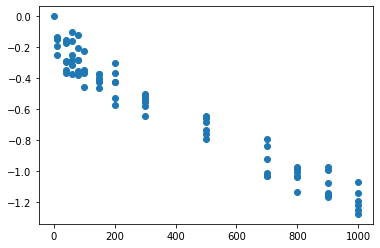

In [20]:
plt.plot(gtab.bvals, np.log(signal/signal[-1]), 'o')

In [21]:
itf = itm.fit(signal)

0.0010665451516006146


/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jovyan/ivim_tensor/ivim_tensor.py:37: RuntimeWarning: overflow encountered in exp
  return beta * np.exp(-b * np.diag(theta @ Q_star @ theta.T)) + (1 - beta) * np.exp(-b * np.diag(theta @ Q @ theta.T))


In [22]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [23]:
itf.perfusion_fraction, itf.perfusion_fit.md, itf.diffusion_fit.md, itf.diffusion_fit.fa

(9.999995560876106e-11, 0.0013624206285878983, 0.0, 0.0)

In [24]:
itm.diffusion_fit.md, itm.perfusion_fit.md

(0.0010665451516006146, 0.001362420628587899)